<a href="https://colab.research.google.com/github/mohdraavi/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project 2 - Yes Bank Stock Closing Price Prediction**
##### **Project Type**    - Regression
##### **Contribution**    - Individual
## <u>**Project by *Mohd Ravi*** 

# **Project Summary -**

# **Problem Statement**

#### Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# **GitHub Link -**



mention

## ***1. Know Your Data***

### Import Libraries

In [1]:
# importing the libraries we'll need.
import numpy as np                # Numerical Computation
import pandas as pd               # Data Manipulation
import matplotlib.pyplot as plt   # Data visualization with plots
%matplotlib inline
import seaborn as sns

import warnings                   # Don't disturb mode
warnings.filterwarnings('ignore')  

### Dataset Loading

In [3]:
# Mounting google drive to load the data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Loeading Dataset
df = pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')

### Dataset First View

In [5]:
#top five rows
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


So there are 185 rows and 5 columns in our dataset

---



Explaining the data:-
We have a dataset containing values of Yes bank monthly stock prices as mentioned in our problem statement. 

Explaining the features present :-


*  **Date :-** The date (Month and Year provided)
*  **Open :-** The price of the stock at the beginning of a particular time period.
*  **High :-**The Peak(Maximum) price at which a stock traded during the period.
*  **Low :-**The Lowest price at which a stock traded during the period.
*  **Close :-** The trading price at the end (in this case end of the month).

In [6]:
#checking for all null values 
df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

So there are no null values in our dataset

### Dataset Information

In [7]:
# Getting information about our data - its datatypes, its size etc. also printing the shape of the data.
df.info()
print('\n', f'The shape of the dataset is : {df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB

 The shape of the dataset is : (185, 5)


So there are 185 rows and 5 columns in our dataset


In [8]:
# getting descriptive statistics of the data.

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,185,185,Jul-05,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,185.0,NaN,NaN,NaN,105.541405,98.87985,10.0,33.8,62.98,153.0,369.95
High,185.0,NaN,NaN,NaN,116.104324,106.333497,11.24,36.14,72.55,169.19,404.0
Low,185.0,NaN,NaN,NaN,94.947838,91.219415,5.55,28.51,58.0,138.35,345.5
Close,185.0,NaN,NaN,NaN,105.204703,98.583153,9.98,33.45,62.54,153.3,367.9


In [9]:
# Let us now preserve the original data before we operate on it.
preserved_data = df.copy()

In [10]:
#checking for duplicates
df[df.duplicated()==True]

,Date,Open,High,Low,Close


we can see there are no duplicate data in our dataframe

In [11]:
#checking the datatype of each feature
df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [13]:
# we can see Date column has datatype  object
df['Date']

0      Jul-05
1      Aug-05
2      Sep-05
3      Oct-05
4      Nov-05
        ...  
180    Jul-20
181    Aug-20
182    Sep-20
183    Oct-20
184    Nov-20
Name: Date, Length: 185, dtype: object

In [14]:
#we need to convert convert thid inot datetime datatype
from datetime import datetime#
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x : datetime.strptime(x,'%b-%y')))   # this converts date to a yyyy-mm-dd format.

In [15]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


Since we are trying to track variation in stock price on different dates, it makes sense to set this column as index.

In [17]:
df.set_index('Date',inplace=True) # setting Date column as index.

In [18]:
#checking the data
df.head()


,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


##Outlier analysis

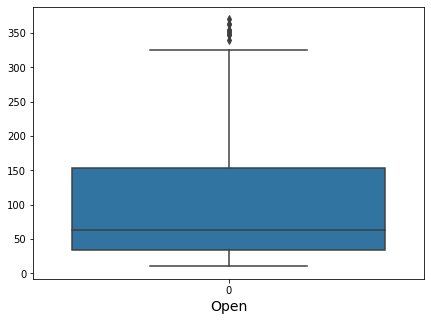

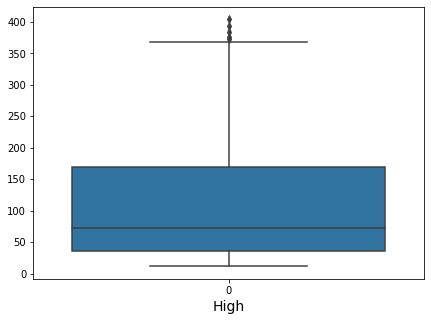

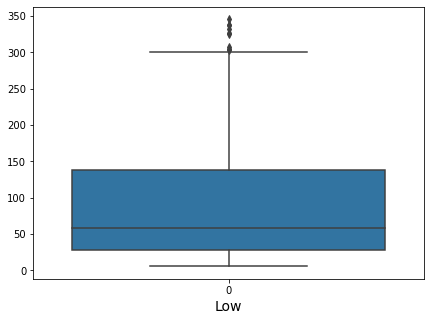

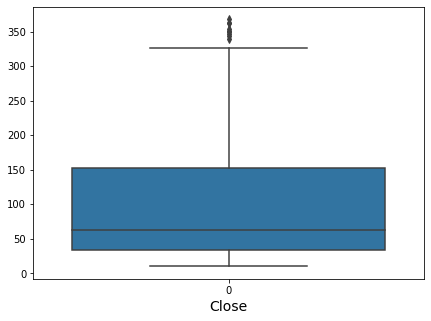

In [19]:
# Checking all features for presence of outliers.
for col in df.columns:
  plt.figure(figsize=(7,5))
  sns.boxplot(df[col])
  plt.xlabel(col,fontsize=14)
  plt.show()

As we can see there are some outliers present in our data. We will need to deal with these before proceeding to modelling.

## **EDA**

In [20]:
#Seprating the dependent and independent variables
independent_variables = df.columns.tolist()[:-1]
dependent_variables = ['Close']

print(independent_variables)
print(dependent_variables)

['Open', 'High', 'Low']
['Close']


Text(0.5, 1.0, 'Closing Price With Date')

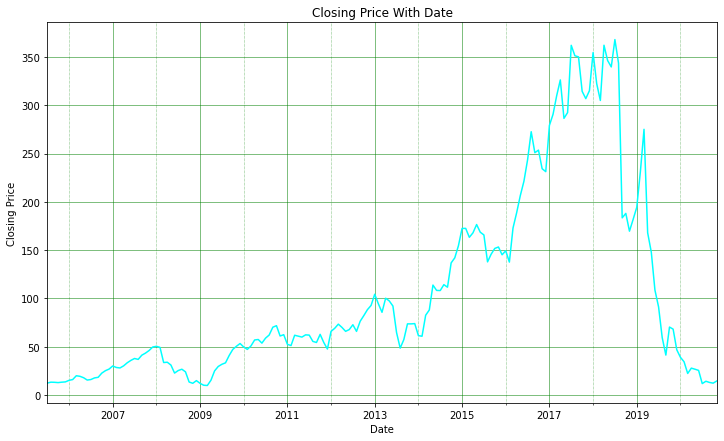

In [21]:
#plotting the dependent variables
plt.figure(figsize=(12,7))
df['Close'].plot(color='cyan')
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='green')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price With Date')

We can see that the stock price is rising up until 2018 when the fraud case involving Rana Kapoor happened after which the stock price has had a sharp decline. 

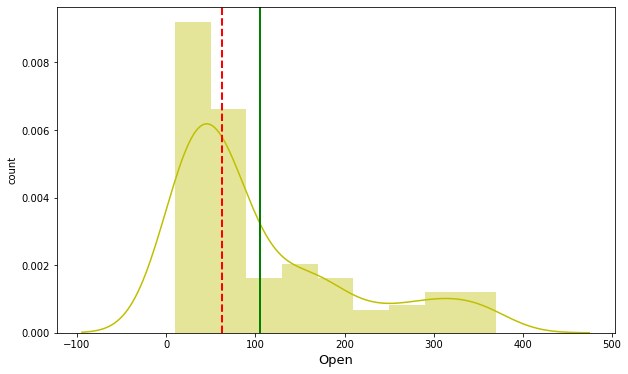

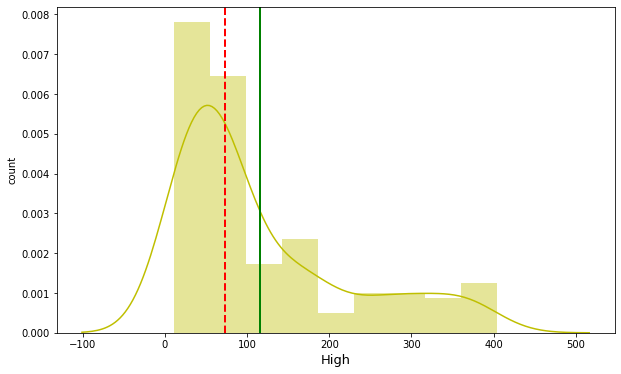

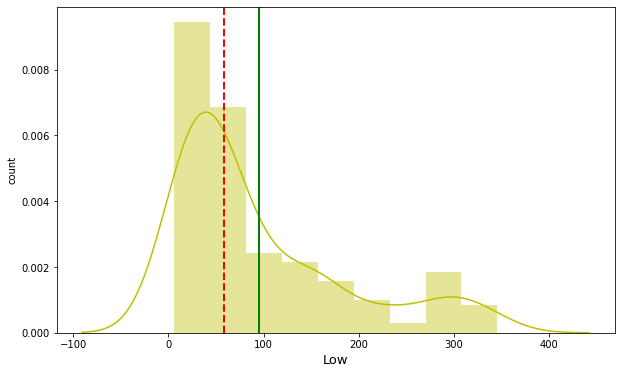

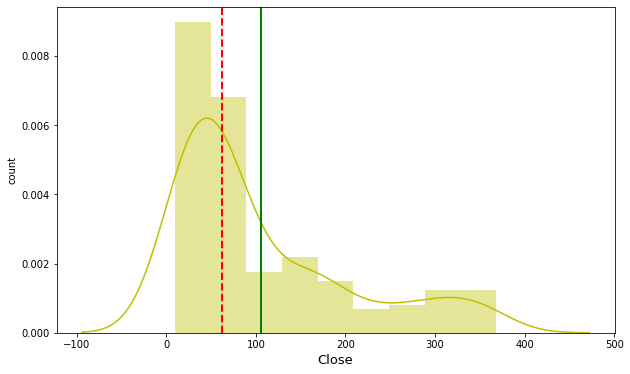

In [22]:
# Plotting the distributions of all features.
for col in df.columns:
  plt.figure(figsize=(10,6))
  sns.distplot(df[col],color='y')
  plt.xlabel(col,fontsize=13)
  plt.ylabel('count')


  plt.axvline(df[col].mean(),color='green',linewidth=2)
  plt.axvline(df[col].median(),color='red',linewidth=2,linestyle='dashed')

We can clearly see that ***these distributions are positively skewed***. The mean and median are at significant distance from each other.

 So we need to transform them into something close to a Normal Distribution as our models give optimal results that way.

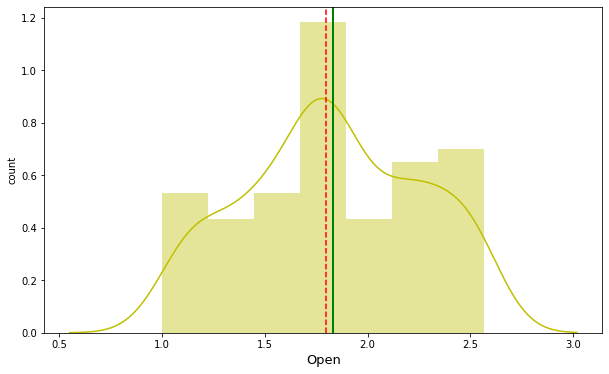

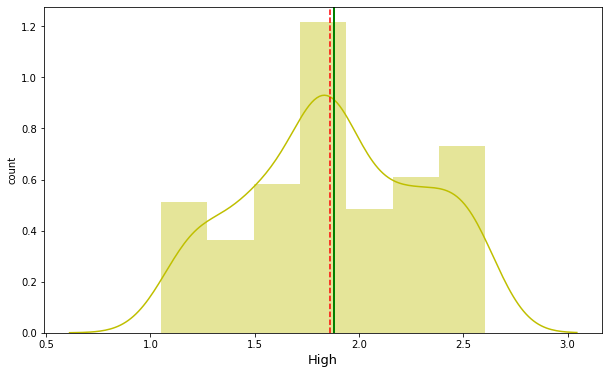

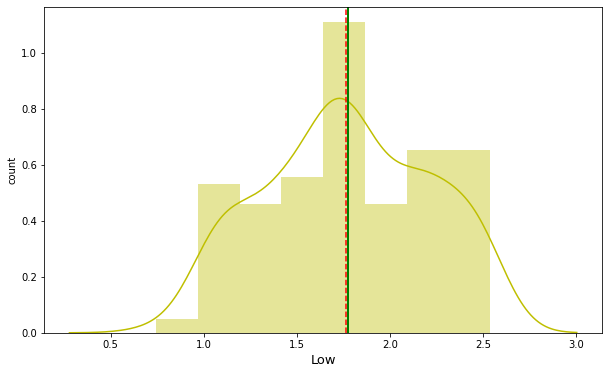

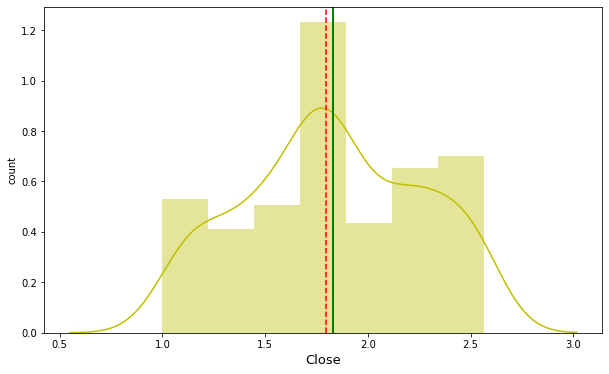

In [23]:
# Lets use log transformation on these features using np.log() and plot them.
for col in df.columns:
  plt.figure(figsize=(10,6))
  sns.distplot(np.log10(df[col]),color='y')
  plt.xlabel(col,fontsize=13)
  plt.ylabel('count')

  #plotting the mean and the medina 
  plt.axvline(np.log10(df[col]).mean(),color='green',linewidth=2)
  plt.axvline(np.log10(df[col]).median(),color='red',linestyle='dashed')

Now, the distributions are very similar to Normal distribution. The mean and median values are nearly same.

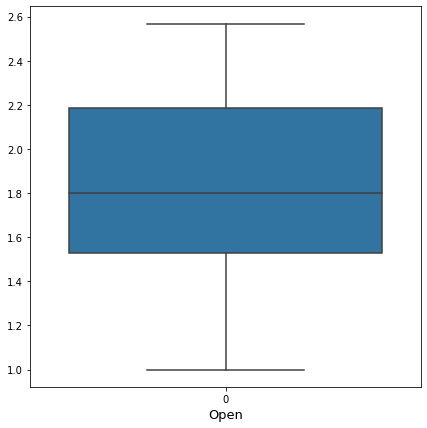

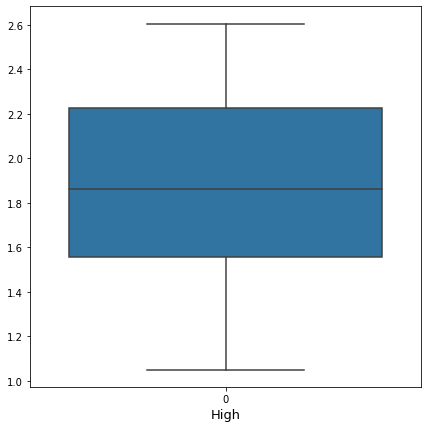

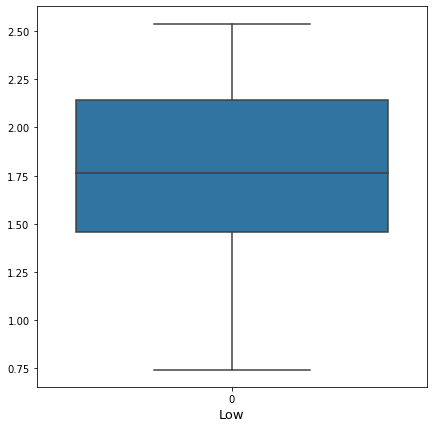

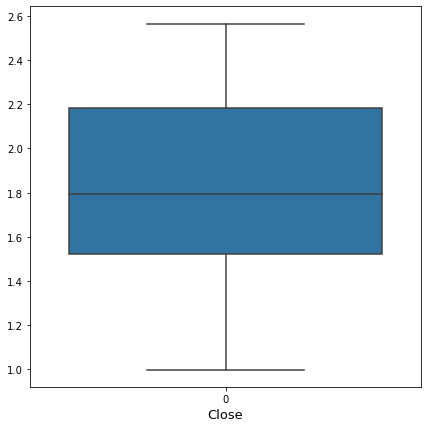

In [24]:
for col in df.columns:
  plt.figure(figsize=(7,7))
  sns.boxplot(np.log10(df[col]))
  plt.xlabel(col,fontsize=13)

Now, we have no outliers anymore. Log transformation diminishes the outlier's effect. 

Since we have a very small dataset to work with, dropping the outliers completely is not a good idea. So this is how we are going to leave them.

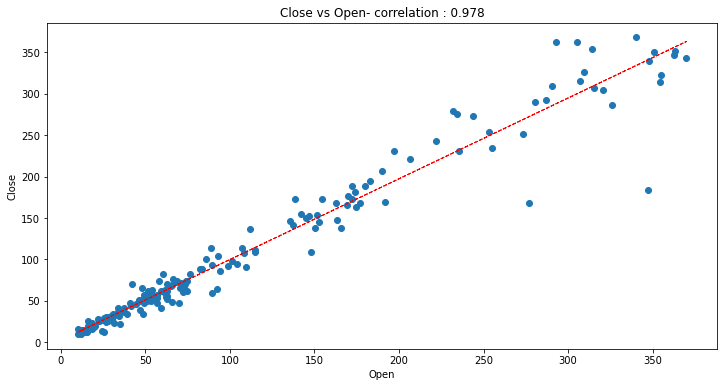

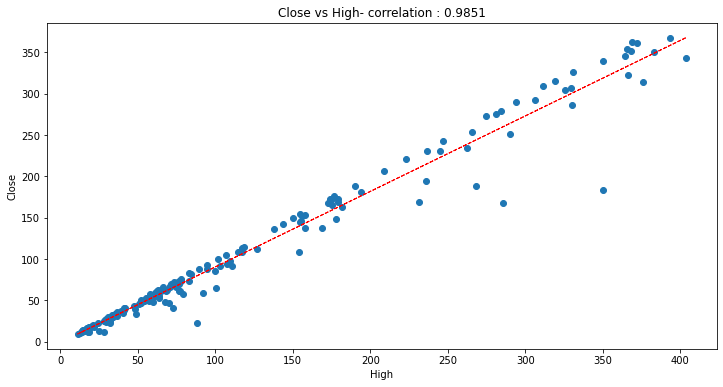

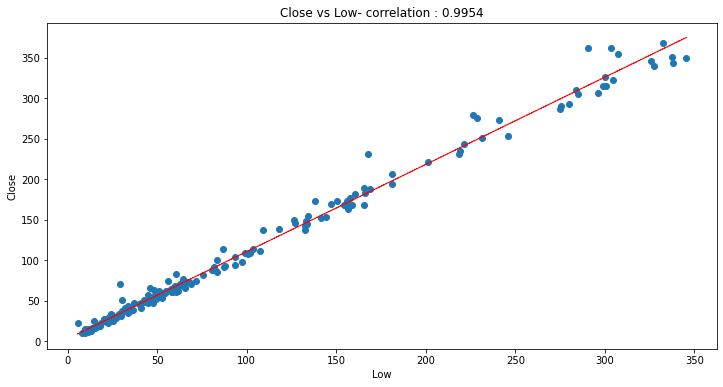

In [25]:
# Plotting the independent variables against dependent variable close and also checking the correlation between them.
for col in independent_variables:
  fig = plt.figure(figsize=(12,6))
  ax = fig.gca()
  feature = df[col]
  label = df['Close']
  correlation = feature.corr(label)
  plt.scatter(x=feature,y=label)

  #setting the x,y labels and titles
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('Close vs ' + col + '- correlation : ' + str(round((correlation),4)))
  z = np.polyfit(df[col],df['Close'],1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col],y_hat,'r--',lw=1)

We can see that all of our independent variables are highly correlated to the dependent variable. 

And the relationship between dependent and independent variables is linear in nature.

<Axes: >

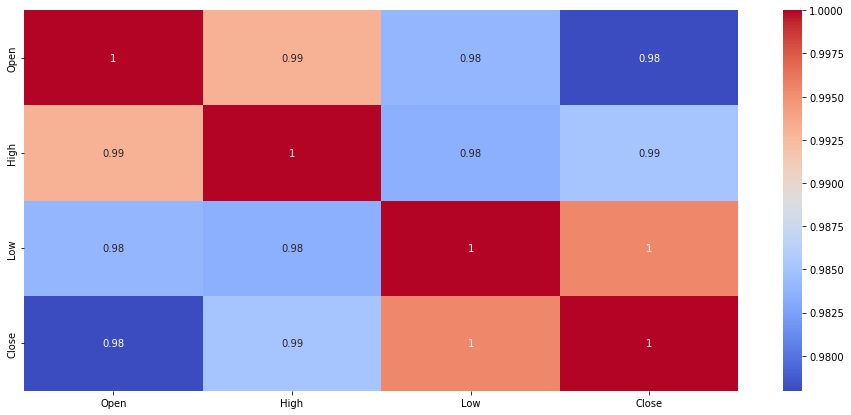

In [26]:
# Now let's visualise for the correlation among all variables.
corr = df.corr()
plt.figure(figsize=(16,7))
sns.heatmap(corr,annot=True,cmap='coolwarm')

From the heatmap above, we can clearly see that there is a very high correlation between each pair of features in our dataset. While it is desirable for the dependent variable to be highly correlated with independent variables, the independent variables should ideally not have high correlation with one another.

***This causes a problem for us as high correlation among independent variables (multicollinearity) is a problem for our models.***

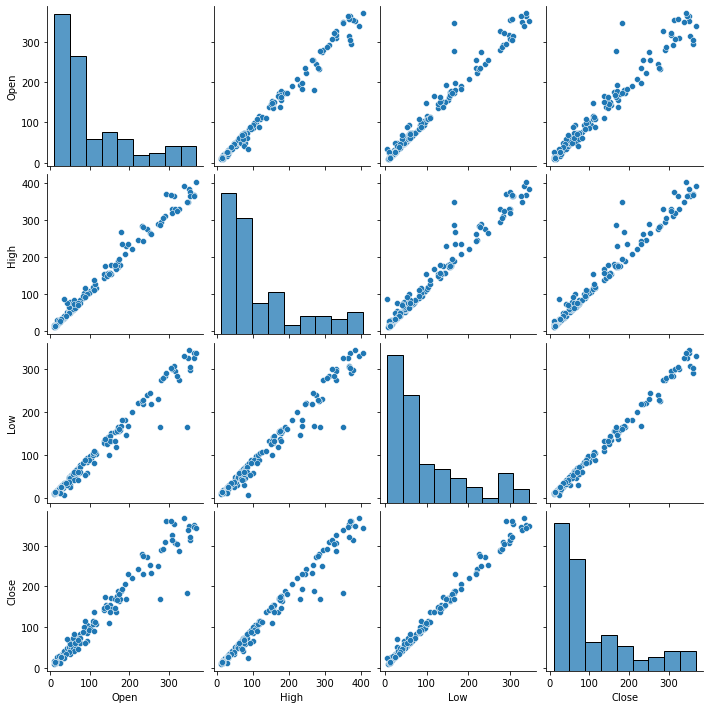

In [27]:
# Let's visualise the relationship between each pair of variables using pair plots.
sns.pairplot(df)

## **Data Preprocessing**


In [28]:
# Dealing with multicollinearity using VIF analysis.
# Calculating VIF(Variation Inflation Factor) to see the correlation between independent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor  

def cal_vif(x):

  vif = pd.DataFrame()
  vif['variables'] = x.columns
  vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

  return(vif)


In [29]:
cal_vif(df[[i for i in df.describe().columns if i not in ['Date','Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


As we can see the values of VIF factor are very high. However since the dataset is so small and has just 3 independent features, multicollinearity is unavoidable here as any feature engineering will lead to loss of information.

In [30]:
# Creating arrays of our input variable and label to feed the data to the model.
# Create the data of independent variables
x = np.log10(df[independent_variables]).values

y = np.log10(df[dependent_variables]).values

In [32]:
#splitting the data into train and test we do this using train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)

In [33]:
x_train.shape

(148, 3)

In [34]:
x_test.shape

(37, 3)

In [35]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

***Scaling the data is very important for us so as to avoid giving more importance to features with large values. This is achieved by normalization or standardization of the data.***

In [36]:
# checking the values.
x_train[0:10]

array([[ 0.83311596,  0.8243388 ,  0.88445745],
       [-1.41735108, -1.31675483, -1.23862182],
       [ 0.3871812 ,  0.35973888,  0.04241403],
       [-0.06900104,  0.01215654, -0.30051561],
       [-1.91321118, -1.50865163, -1.71568543],
       [-0.2660071 ,  0.10246554, -0.21069831],
       [-0.29592654, -0.34290717, -0.15641974],
       [-0.59033534, -0.59737272, -0.45688014],
       [-0.24949754, -0.27329508, -0.60357017],
       [-0.94310352, -0.99502356, -1.60535529]])

## **1. Linear Regression**

In [38]:
# importing LinearRegression model and the metrics that we will use for evaluating different models performance.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [45]:
#initializing the model 
Linear_model = LinearRegression()
#fitting the model on our train data 
Linear_model.fit(x_train, y_train)


LinearRegression()

In [46]:
#predicting on our test data 
y_pred = Linear_model.predict(x_test)

In [47]:
#checking the model parameters. printing the intercept
Linear_model.intercept_

array([1.79986471])

In [48]:
#printing the model coefficient
Linear_model.coef_


array([[-0.22992597,  0.33533242,  0.31585415]])

In [50]:
#checking the performance metrics
MAE = round(mean_absolute_error(10**(y_test),(10**y_pred)),4)
print(f'Mean Absolute Error : {MAE}')

MSE = round(mean_squared_error((10**y_test),10**(y_pred)),4)
print(f'Mean Squared Error : {MSE}')

RMSE = round(np.sqrt(MSE),4)
print(f'Root Mean Squared Error : {MSE}')

R2_score = round(r2_score(10**(y_test),10**(y_pred)),4)
print(f'R2 score : {R2_score}')

adjusted_r2 = round(1-(1-r2_score(10**y_test,10**y_pred))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),4)
print(f'Adjusted R2 score : {adjusted_r2}')


Mean Absolute Error : 4.8168
Mean Squared Error : 70.4204
Root Mean Squared Error : 70.4204
R2 score : 0.9937
Adjusted R2 score : 0.9932


Text(0.5, 1.0, 'Actual vs Predicted Closing price Linear Regression')

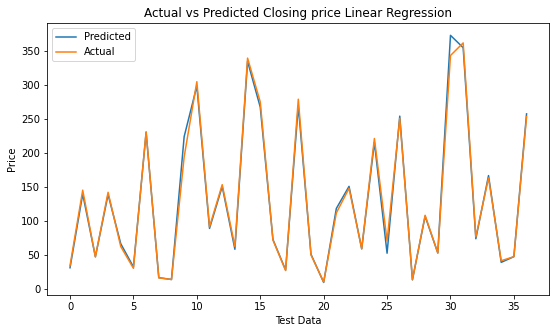

In [51]:
#plotting the actual and predicted test data 
plt.figure(figsize=(9,5))
plt.plot(10**y_pred)
plt.plot(np.array(10**y_test))
plt.legend(['Predicted','Actual'])
plt.xlabel('Test Data')
plt.ylabel('Price')
plt.title('Actual vs Predicted Closing price Linear Regression')

Now we need to store our performance data for this model so that we can compare them with other models. Let's store them in a dict for now.

In [52]:
dict_of_linear_metrics = {'Mean Absolute Error ':MAE,'Mean Squared Erro ':MSE,'Root Mean Squared Error ':RMSE,'R2_score':R2_score,'Adjusted R2_score':adjusted_r2}

In [54]:
dict_of_linear_metrics

{'Mean Absolute Error ': 4.8168,
 'Mean Squared Erro ': 70.4204,
 'Root Mean Squared Error ': 8.3917,
 'R2_score': 0.9937,
 'Adjusted R2_score': 0.9932}

In [57]:
#converting to dict to dataframe
dict_of_linear_metrics = pd.DataFrame.from_dict(dict_of_linear_metrics,orient='index').reset_index()

In [58]:
dict_of_linear_metrics

,index,0
0,Mean Absolute Error,4.8168
1,Mean Squared Erro,70.4204
2,Root Mean Squared Error,8.3917
3,R2_score,0.9937
4,Adjusted R2_score,0.9932


In [59]:
#converting dic into column
dataframe_of_metrics = dict_of_linear_metrics.rename(columns={'index':'Metric',0:'Linear Regression score'})

In [60]:
dataframe_of_metrics

,Metric,Linear Regression score
0,Mean Absolute Error,4.8168
1,Mean Squared Erro,70.4204
2,Root Mean Squared Error,8.3917
3,R2_score,0.9937
4,Adjusted R2_score,0.9932


We will now use this df to store all metrics of all other models so we can easily compare them.

#2. **Lasso Regression** with cross validated regularization.

In [61]:
#importing libarry of lasso model
from sklearn.linear_model import Lasso


In [62]:
#initializing the model some base values.
lasso = Lasso(alpha=0.0001,max_iter=3000)
#fitting the model on our training data 
lasso.fit(x_train,y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [63]:
# Printing the intercept and coefficients.
lasso.intercept_

array([1.79986471])

In [65]:
#printing model coefficients
lasso.coef_

array([-0.2079326 ,  0.319775  ,  0.30927158])

In [69]:
#cross validation ,optimizing our model by finding the best value 
from sklearn.model_selection import GridSearchCV

lasso_parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.005,0.006,0.007,0.01,0.015,0.02,1e-1,1,5,10,20,30,40,45,50]}

lasso_regressor = GridSearchCV(lasso,lasso_parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001, max_iter=3000),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.005, 0.006, 0.007, 0.01, 0.015,
                                   0.02, 0.1, 1, 5, 10, 20, 30, 40, 45, 50]},
             scoring='neg_mean_squared_error')

In [71]:
# getting the best parameter
lasso_regressor.best_params_          # after several iterations and trials, we get this value as best parameter value.

{'alpha': 1e-05}

In [72]:
# getting the best score
lasso_regressor.best_score_

-0.0011530156671872803

In [73]:
#predicting on the test dataset
lasso_y_pred = lasso_regressor.predict(x_test)
print(lasso_y_pred)

[1.49138725 2.14480164 1.67440535 2.14228699 1.82187891 1.50772917
 2.36207529 1.21547491 1.13723019 2.35007689 2.4750589  1.94911733
 2.17805254 1.76496504 2.52500153 2.427082   1.86088626 1.44157089
 2.43007104 1.70654066 0.97170315 2.07286344 2.17847869 1.76889148
 2.33378329 1.71856753 2.40521703 1.1226477  2.02876294 1.72319367
 2.5717837  2.5499049  1.86710909 2.22199908 1.59040105 1.67512911
 2.41082202]


In [75]:
# checking the performance using evaluation metrics.
MAE_lasso = round(mean_absolute_error(10**(y_test),10**(lasso_y_pred)),4)
print(f"Mean Absolute Error : {MAE_lasso}")

MSE_lasso  = round(mean_squared_error(10**(y_test),10**(lasso_y_pred)),4)
print("Mean squared Error :" , MSE_lasso)

RMSE_lasso = round(np.sqrt(MSE_lasso),4)
print("Root Mean squared Error :" ,RMSE_lasso)

R2_lasso = round(r2_score(10**(y_test), 10**(lasso_y_pred)),4)
print("R2 score :" ,R2_lasso)

Adjusted_R2_lasso = round(1-(1-r2_score(10**y_test, 10**lasso_y_pred))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),4)
print("Adjusted R2 score: ", Adjusted_R2_lasso)

Mean Absolute Error : 4.8262
Mean squared Error : 70.3311
Root Mean squared Error : 8.3864
R2 score : 0.9938
Adjusted R2 score:  0.9932


In [76]:
# Now saving these metrics to our metrics dataframe. First we save them in a list and then we pass them to the df.
dataframe_of_metrics['Lasso'] = [MAE_lasso, MSE_lasso, RMSE_lasso, R2_lasso, Adjusted_R2_lasso]

In [77]:
dataframe_of_metrics

,Metric,Linear Regression score,Lasso
0,Mean Absolute Error,4.8168,4.8262
1,Mean Squared Erro,70.4204,70.3311
2,Root Mean Squared Error,8.3917,8.3864
3,R2_score,0.9937,0.9938
4,Adjusted R2_score,0.9932,0.9932


Text(0.5, 1.0, 'Actual vs Predicted Closing price Lasso regression')

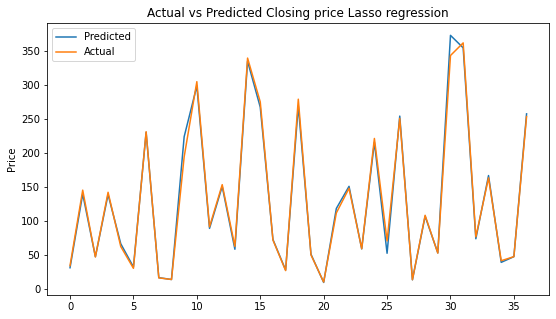

In [79]:
# plotting the predicted values vs actual.
plt.figure(figsize=(9,5))
plt.plot(10**lasso_y_pred)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Lasso regression")

## 3. **Ridge Regression** with cross validated regularization.

In [80]:
# importing ridge regressor model.
from sklearn.linear_model import Ridge    
ridge = Ridge()         # initializing the model

# initiating the parameter grid for alpha (regularization strength).
ridge_param_grid = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}

# cross validation. 
ridge_regressor = GridSearchCV(ridge, ridge_param_grid, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.3, 0.7, 1, 1.2, 1.33, 1.365, 1.37,
                                   1.375, 1.4, 1.5, 1.6, 1.8, 2.5, 5, 10, 20,
                                   30, 40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [81]:
# finding the best parameter value (for alpha)
ridge_regressor.best_params_

{'alpha': 0.01}

In [83]:
# getting the best score for optimal value of alpha.
ridge_regressor.best_score_

-0.001306921437493189

In [82]:
# predicting on the test dataset now.
y_pred_ridge = ridge_regressor.predict(x_test)

In [84]:
# evaluating performance.
MAE_ridge = round(mean_absolute_error(10**(y_test),10**(y_pred_ridge)),4)
print(f"Mean Absolute Error : {MAE_ridge}")

MSE_ridge  = round(mean_squared_error(10**(y_test),10**(y_pred_ridge)),4)
print("Mean squared Error :" , MSE_ridge)

RMSE_ridge = round(np.sqrt(MSE_ridge),4)
print("Root Mean squared Error :" ,RMSE_ridge)

R2_ridge = round(r2_score(10**(y_test), 10**(y_pred_ridge)),4)
print("R2 score :" ,R2_ridge)

Adjusted_R2_ridge = round(1-(1-r2_score(10**y_test, 10**y_pred_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),4)
print("Adjusted R2 score: ", Adjusted_R2_ridge)

Mean Absolute Error : 4.8334
Mean squared Error : 70.2641
Root Mean squared Error : 8.3824
R2 score : 0.9938
Adjusted R2 score:  0.9932


In [86]:
# storing these values in a list and appending to our metric df.
ridge_regressor_list = [MAE_ridge,MSE_ridge,RMSE_ridge,R2_ridge,Adjusted_R2_ridge]
dataframe_of_metrics
dataframe_of_metrics['Ridge'] = ridge_regressor_list

In [87]:
dataframe_of_metrics

,Metric,Linear Regression score,Lasso,Ridge
0,Mean Absolute Error,4.8168,4.8262,4.8334
1,Mean Squared Erro,70.4204,70.3311,70.2641
2,Root Mean Squared Error,8.3917,8.3864,8.3824
3,R2_score,0.9937,0.9938,0.9938
4,Adjusted R2_score,0.9932,0.9932,0.9932


Text(0.5, 1.0, 'Actual vs Predicted Closing price Ridge regression')

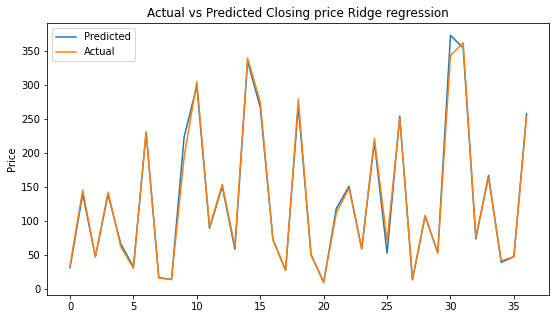

In [88]:
# Plotting predicted and actual target variable values.
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_ridge)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Ridge regression")

## 4. **Elastic-Net Regression** with cross validation.

In [91]:
#importing and initializing Elastic Net Regression
from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

#initializaing paramters grid 
elastic_net_param_grid = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100],
                          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
# cross-validation.
elasticnet_regressor = GridSearchCV(elasticnet_model, elastic_net_param_grid, scoring='neg_mean_squared_error',cv=5)
elasticnet_regressor.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=ElasticNet(alpha=0.1),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.001, 0.01, 0.02, 0.03, 0.04, 1, 5,
                                   10, 20, 40, 50, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error')

In [92]:
# finding the best parameter
elasticnet_regressor.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.1}

In [93]:
# finding the best score for the optimal parameter.
elasticnet_regressor.best_score_

-0.0011528695836730079

In [94]:
# making the predictions.
y_pred_elastic_net = elasticnet_regressor.predict(x_test)

In [95]:
MAE_elastic_net = round(mean_absolute_error(10**(y_test),10**(y_pred_elastic_net)),4)
print(f"Mean Absolute Error : {MAE_elastic_net}")

MSE_elastic_net  = round(mean_squared_error(10**(y_test),10**(y_pred_elastic_net)),4)
print("Mean squared Error :" , MSE_elastic_net)

RMSE_elastic_net = round(np.sqrt(MSE_elastic_net),4)
print("Root Mean squared Error :" ,RMSE_elastic_net)

R2_elastic_net = round(r2_score(10**(y_test), (10**y_pred_elastic_net)),4)
print("R2 score :" ,R2_elastic_net)

Adjusted_R2_elastic_net = round(1-(1-r2_score(10**y_test, 10**y_pred_elastic_net))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),4)
print("Adjusted R2 score: ", Adjusted_R2_elastic_net)

Mean Absolute Error : 4.8483
Mean squared Error : 70.1569
Root Mean squared Error : 8.376
R2 score : 0.9938
Adjusted R2 score:  0.9932


In [96]:
# storing these metrics in our dataframe.
elastic_net_metric_list = [MAE_elastic_net,MSE_elastic_net,RMSE_elastic_net,R2_elastic_net,Adjusted_R2_elastic_net]
dataframe_of_metrics['Elastic Net'] = elastic_net_metric_list

Text(0.5, 1.0, 'Actual vs Predicted Closing price Elastic Net regression')

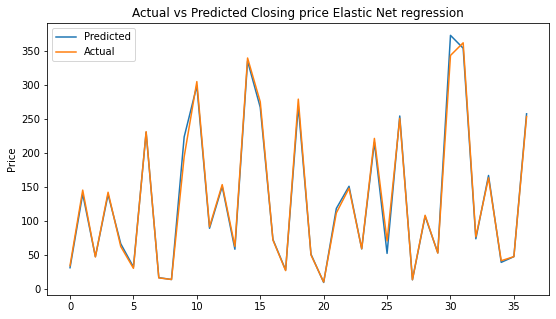

In [97]:
# Now let us plot the actual and predicted target variables values.
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_elastic_net)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Elastic Net regression")

In [98]:
dataframe_of_metrics

,Metric,Linear Regression score,Lasso,Ridge,Elastic Net
0,Mean Absolute Error,4.8168,4.8262,4.8334,4.8483
1,Mean Squared Erro,70.4204,70.3311,70.2641,70.1569
2,Root Mean Squared Error,8.3917,8.3864,8.3824,8.3760
3,R2_score,0.9937,0.9938,0.9938,0.9938
4,Adjusted R2_score,0.9932,0.9932,0.9932,0.9932


From above data, we can clearly see that the best performing model is Elastic Net as it scores the best in every single metric.

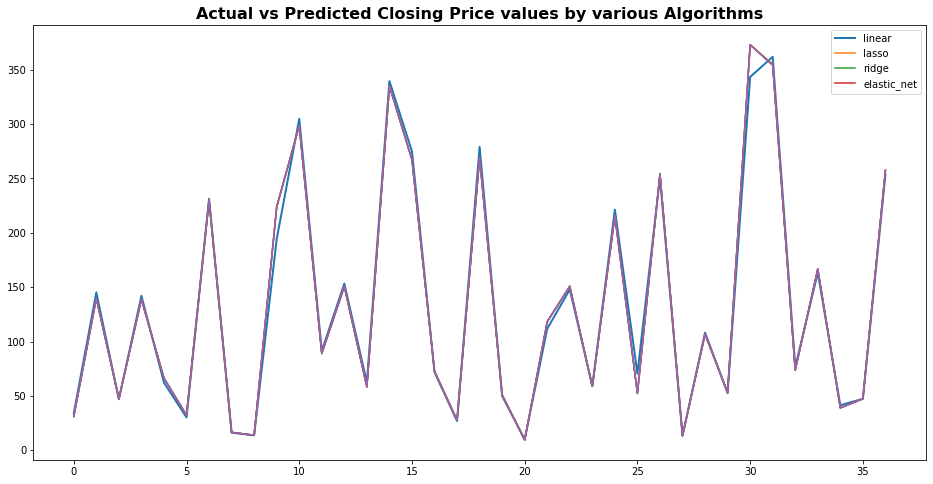

In [100]:
# Plotting the predicted values of all the models against the true values.
plt.figure(figsize=(16,8))
plt.plot(10**y_test, linewidth=2)
plt.plot(10**y_pred)
plt.plot(10**lasso_y_pred)
plt.plot(10**y_pred_ridge)
plt.plot(10**y_pred_elastic_net)
plt.legend(['linear','lasso','ridge','elastic_net'])
plt.title('Actual vs Predicted Closing Price values by various Algorithms', weight = 'bold',fontsize=16)
plt.show()

As we can see from above graph, all of our models are performing really well and are able to closely approximate the actual values.

Text(0.5, 1.0, 'Actual Test data vs Residuals (Elastic Net)')

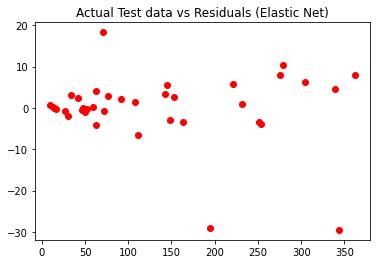

In [101]:
# Lets check for Heterodasticity. Homoscedasticity is an assumption in linear regression algorithm.
# Homoscedasticity means that the model should perform well on all the datapoints.

# Plotting the residuals(errors) against actual test data.
residuals = 10**y_test - 10**y_pred_elastic_net.reshape(37,1)
plt.scatter(10**y_test,residuals,c='red')
plt.title('Actual Test data vs Residuals (Elastic Net)')

In the above graph, we have plotted the residuals against test set value for our actual test set values for our best performing model (Elastic Net Regressor).

***As we can see, there is no discernable pattern here in the plot. The errors are similar for all datapoints and the model is performing equally well on all datapoints. So we can say that the assumption of Homoscedasticity is valid in this case.***  

## **Conclusions Drawn :**
---

*   **Using data visualization on our target variable, we can clearly see the impact of 2018 fraud case involving Rana Kapoor as the stock prices decline dramatically during that period.**
*   **After loading the dataset, we found that there are no null values in our dataset nor any duplicate data.**
*   **There are some outliers in our features however this being a very small dataset, dropping those instances will lead to loss of information.**
*   **We found that the distribution of all our variables is positively skewed. so we performed log transformation on them.**
*   **There is a high correlation between the dependent and independent variables. This is a signal that our dependent variable is highly dependent on our features and can be predicted accurately from them.**
*   **We found that there is a rather high correlation between our independent variables. This multicollinearity is however unavoidable here as the dataset is very small.**
*   **We implemented several models on our dataset in order to be able to predict the closing price and found that all our models are performing remarkably well and *Elastic Net regressor is the best performing model with Adjusted R2 score value of 0.9932* and scores well on all evaluation metrics.** 
*   **All of the implemented models performed quite well on our data giving us the Adjusted R-square of over 99%.**
*   **We checked for presence of Heterodasceticity in our dataset by plotting the residuals against the Elastic Net model predicted value and found that there is no Heterodasceticity present. Our model is performing well on all data-points.**
*   **With our model making predictions with such high accuracy, we can confidently deploy this model for further predictive tasks using future data.** 


---


---













